# Lab 6: Association Rule Mining – Apriori and FP-Growth
**Name:** Sindhuja Martha   
**Course:** MSCS-634-B01  
**Lab Title:** Association Rule Mining with Apriori and FP-Growth  


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


## Step 1: Data Preparation
- Load a transactional dataset.
- Perform cleaning (remove missing values/duplicates).
- Create visualizations to explore data (barplots, heatmaps).


In [3]:
# Load the dataset (replace with your dataset path)
data = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')

# Show first 5 rows
data.head()


,Date,Product,Sales Person,Boxes Shipped,Amount ($),Country
0,2022-02-06,Pain Relief Tablets,Divya Mehra,7,67.43,Australia
1,2022-02-05,Antiseptic Cream,Nikhil Batra,18,421.46,Canada
2,2022-02-19,Cough Syrup,Ritika Shah,2,48.25,UK
3,2022-03-28,Pain Relief Tablets,Nikhil Batra,5,59.89,UK
4,2022-01-17,Digestive Enzyme,Ritika Shah,8,147.73,USA


## Prepare Basket Format
- Convert transactional data into a matrix format with transactions as rows and items as columns.
- Use one-hot encoding: 1 if item purchased in a transaction, else 0.


In [11]:
import pandas as pd

# Load your dataset
data = pd.read_csv("OnlineRetail.csv")

# Group by Date and Product, count the number of times each product was sold on each date
basket = data.groupby(['Date', 'Product'])['Product'].count().unstack().fillna(0)

# Convert counts to 1/0 (binary matrix) using map
basket = basket.map(lambda x: 1 if x > 0 else 0)


basket.head()



Product,Allergy Pills,Antiseptic Cream,Cough Syrup,Digestive Enzyme,Eye Drops,Nasal Spray,Pain Relief Tablets
Date,,,,,,,
2022-01-02,0,0,0,1,0,0,1
2022-01-05,0,0,0,0,1,0,0
2022-01-06,0,0,0,0,1,0,0
2022-01-07,1,1,0,1,1,0,0
2022-01-08,0,0,1,0,0,0,0


In [5]:
print(data.columns)


Index(['Date', 'Product', 'Sales Person', 'Boxes Shipped', 'Amount ($)', 'Country'], dtype='object')


## Visualize Top Items
- Visualize the top 10 most frequently purchased items using bar plots.


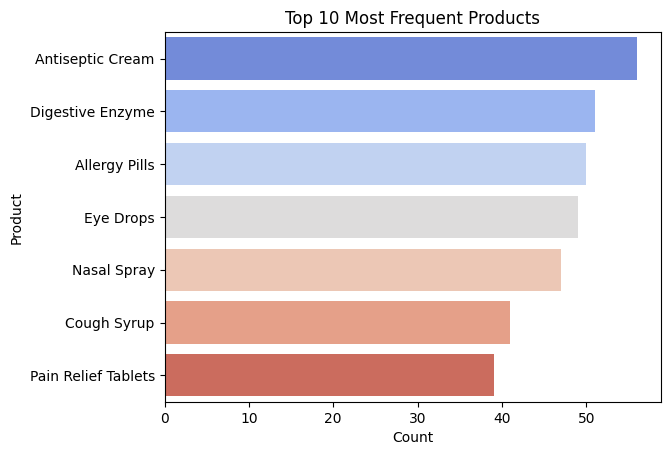

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

top_items = data['Product'].value_counts().head(10)

sns.barplot(x=top_items.values, y=top_items.index, hue=top_items.index, palette='coolwarm', legend=False)
plt.title('Top 10 Most Frequent Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()



## Step 2: Frequent Itemset Mining Using Apriori
- Use Apriori algorithm to find frequent itemsets with a minimum support threshold.


In [13]:
from mlxtend.frequent_patterns import apriori

# Ensure basket contains boolean values instead of 0/1 integers
basket = (basket > 0).astype(bool)

# Apply Apriori algorithm
frequent_itemsets_apriori = apriori(basket, min_support=0.02, use_colnames=True)

# Sort by support
frequent_itemsets_apriori.sort_values(by='support', ascending=False, inplace=True)

# Display top 10 frequent itemsets
frequent_itemsets_apriori.head(10)



,support,itemsets
1,0.279330,(Antiseptic Cream)
5,0.256983,(Nasal Spray)
3,0.256983,(Digestive Enzyme)
4,0.240223,(Eye Drops)
0,0.234637,(Allergy Pills)
6,0.206704,(Pain Relief Tablets)
2,0.201117,(Cough Syrup)
7,0.067039,"(Allergy Pills, Antiseptic Cream)"
15,0.067039,"(Eye Drops, Antiseptic Cream)"
22,0.067039,"(Digestive Enzyme, Nasal Spray)"


## Visualize Top Apriori Itemsets
- Plot the top 10 frequent itemsets discovered by Apriori.


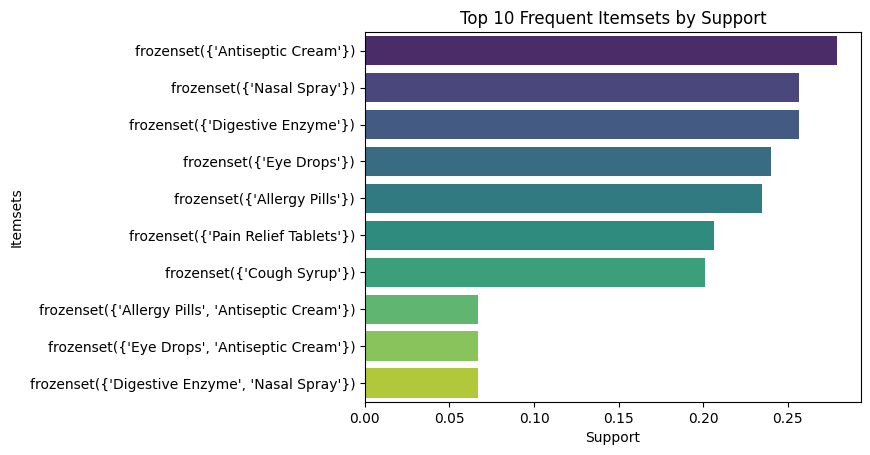

In [16]:
sns.barplot(
    x=top_apriori['support'],
    y=top_apriori['itemsets'].astype(str),
    hue=top_apriori['itemsets'].astype(str),  # Use y variable as hue
    palette='viridis',
    legend=False
)
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()



## Step 3: Frequent Itemset Mining Using FP-Growth
- Use FP-Growth algorithm with the same support threshold.
- Compare efficiency with Apriori.


In [19]:
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.02, use_colnames=True)
frequent_itemsets_fpgrowth.sort_values(by='support', ascending=False, inplace=True)
frequent_itemsets_fpgrowth.head(10)



,support,itemsets
3,0.279330,(Antiseptic Cream)
6,0.256983,(Nasal Spray)
0,0.256983,(Digestive Enzyme)
2,0.240223,(Eye Drops)
4,0.234637,(Allergy Pills)
1,0.206704,(Pain Relief Tablets)
5,0.201117,(Cough Syrup)
16,0.067039,"(Allergy Pills, Antiseptic Cream)"
26,0.067039,"(Digestive Enzyme, Nasal Spray)"
13,0.067039,"(Eye Drops, Antiseptic Cream)"


## Step 4: Generate Association Rules
- Generate association rules from the frequent itemsets.
- Use confidence and lift metrics to filter strong rules.


In [14]:
rules = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.5)
rules.sort_values(by='confidence', ascending=False, inplace=True)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


## Visualize Association Rules
- Scatter plot of confidence vs lift to identify strong rules.


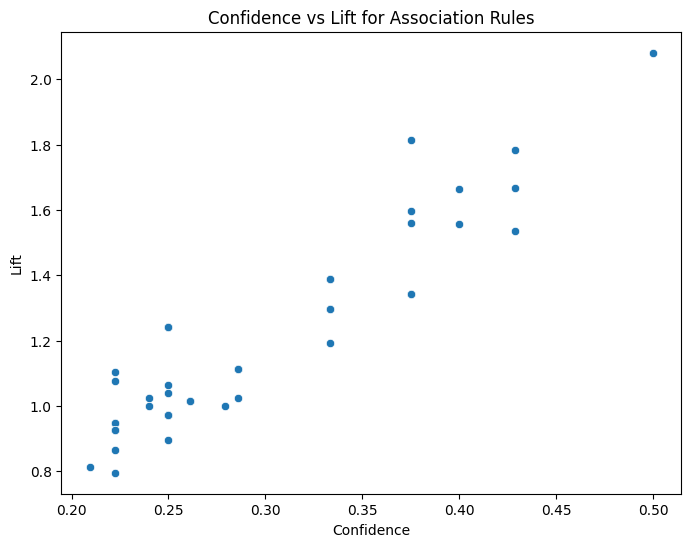

In [10]:
if not rules.empty:
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='confidence', y='lift', data=rules)
    plt.title('Confidence vs Lift for Association Rules')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.show()
else:
    print("No rules found. Try reducing thresholds.")


## Step 5: Comparative Analysis and Conclusion
- FP-Growth is usually faster than Apriori, especially on large datasets, due to its tree structure.
- Apriori generates candidate itemsets, which can be computationally expensive.
- Data cleaning and parameter tuning are critical for meaningful results.
- Association rules help identify useful item combinations for marketing strategies.

---

This lab enhanced understanding of association rule mining techniques and their practical application in retail data analysis.


```python
# Display the top 10 frequent itemsets sorted by support in descending order
print(frequent_itemsets.sort_values('support', ascending=False).head(10))


In [8]:
print(frequent_itemsets.sort_values('support', ascending=False).head(10))


     support                           itemsets
1   0.279330                 (Antiseptic Cream)
3   0.256983                 (Digestive Enzyme)
5   0.256983                      (Nasal Spray)
4   0.240223                        (Eye Drops)
0   0.234637                    (Allergy Pills)
6   0.206704              (Pain Relief Tablets)
2   0.201117                      (Cough Syrup)
7   0.067039  (Allergy Pills, Antiseptic Cream)
15  0.067039      (Eye Drops, Antiseptic Cream)
23  0.067039    (Digestive Enzyme, Nasal Spray)
